We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [1]:
import pandas as pd
data = pd.read_csv('airlines_passengers.csv')

Let’s display the first five rows of data

In [2]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [3]:
data[-5:]

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [4]:
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')


The next thing we can do is convert the month column to an index. 


In [5]:
data.set_index('Month', inplace=True)


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

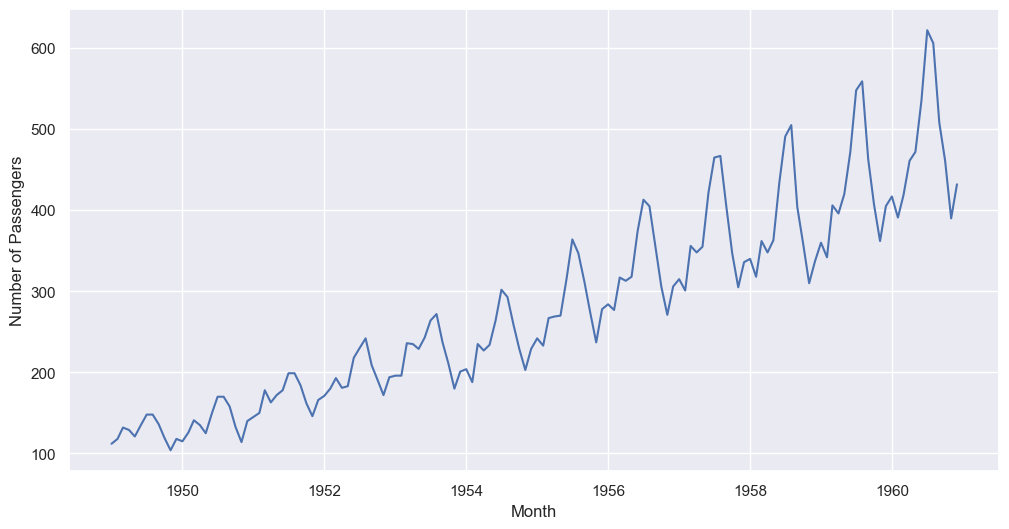

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

plt.figure(figsize=(12,6))
sns.lineplot(x=data.index, y=data['Passengers'])
plt.ylabel('Number of Passengers')
plt.show()


Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [9]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [11]:
# Perform the ADF test
result = sm.tsa.stattools.adfuller(data, autolag='AIC')

# Extract the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Print the results
print(f'ADF Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('The data is stationary.')
else:
    print('The data is not stationary.')

ADF Test Statistic: 0.8153688792060502
p-value: 0.991880243437641
The data is not stationary.


Store our results in a dataframe display it

In [13]:
df = pd.DataFrame(result[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'], columns=['value'])
df

,value
Test Statistic,0.815369
p-value,0.991880
Lags Used,13.000000
Number of Observations Used,130.000000


Explain the results

The Augmented Dickey-Fuller test is used to check whether a time series is stationary or not. Stationarity is a key assumption in many time series models, as it ensures that the statistical properties of the time series do not change over time. The test returns a test statistic and a p-value.

In the results you provided, the test statistic is 0.815369, and the p-value is 0.991880. The null hypothesis of the test is that the time series is non-stationary, and the alternative hypothesis is that the time series is stationary.

In this case, the p-value is very large (close to 1), which suggests that we cannot reject the null hypothesis. Therefore, we can conclude that the time series is non-stationary. This is further supported by the fact that the number of lags used is 13, and the number of observations used is 130, which indicates that the test had to use a significant number of lags to make the series stationary.

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

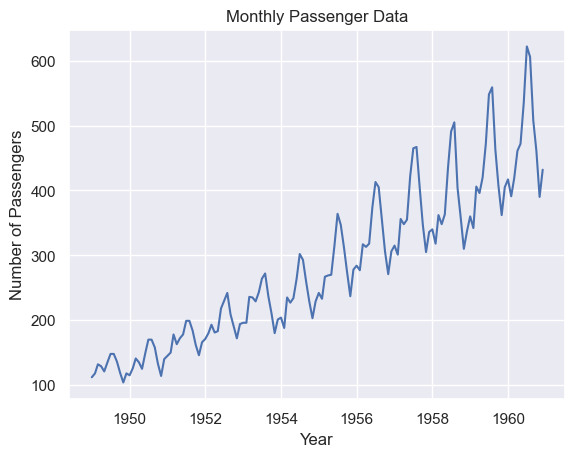

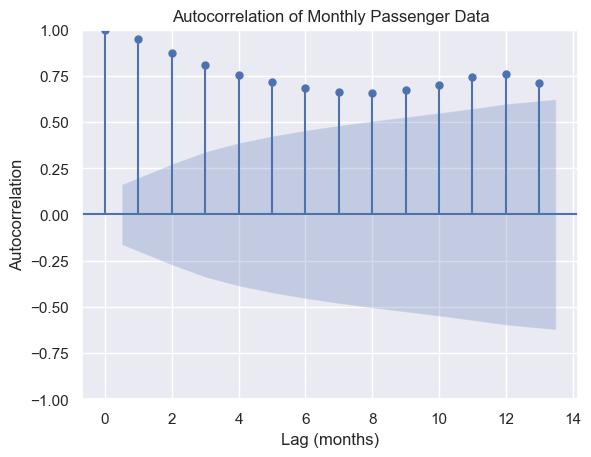

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the passenger data
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Monthly Passenger Data')
plt.show()

# Calculate and plot autocorrelation
plot_acf(data, lags=13)
plt.xlabel('Lag (months)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Monthly Passenger Data')
plt.show()

Calculate partial autocorrelation

c:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


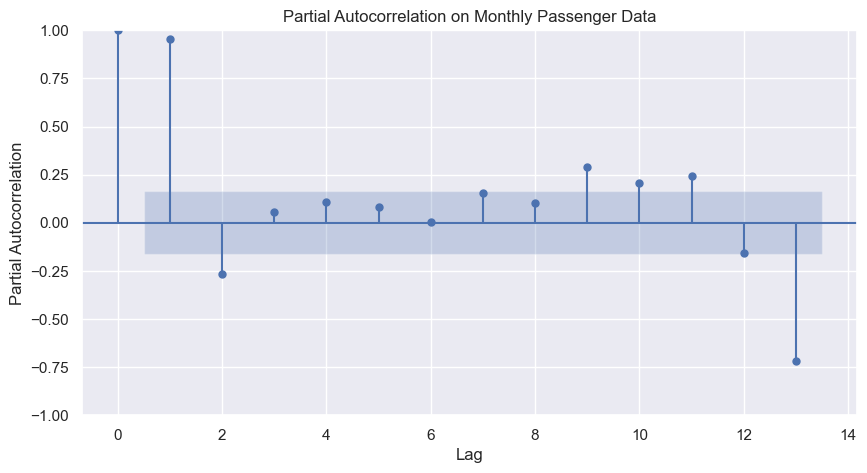

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the partial autocorrelation function
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(data, lags=13, ax=ax)
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('Partial Autocorrelation on Monthly Passenger Data')
plt.show()


Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


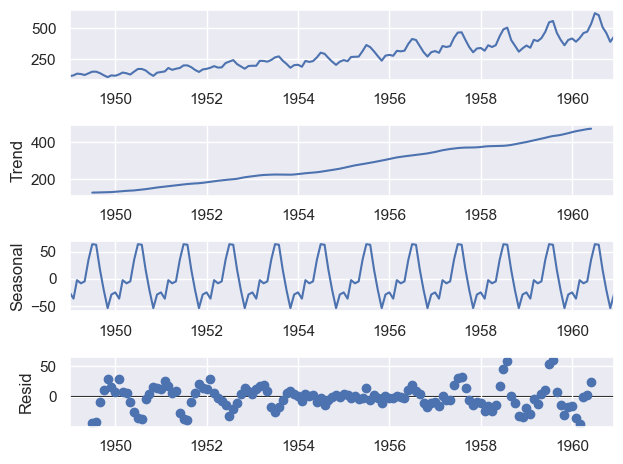

In [17]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
decompose = decomposition.plot()
plt.show()


Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [19]:
deseasonalized.head()

,1949-01-01 00:00:00,1949-02-01 00:00:00,1949-03-01 00:00:00,1949-04-01 00:00:00,1949-05-01 00:00:00,1949-06-01 00:00:00,1949-07-01 00:00:00,1949-08-01 00:00:00,1949-09-01 00:00:00,1949-10-01 00:00:00,...,1960-04-01 00:00:00,1960-05-01 00:00:00,1960-06-01 00:00:00,1960-07-01 00:00:00,1960-08-01 00:00:00,1960-09-01 00:00:00,1960-10-01 00:00:00,1960-11-01 00:00:00,1960-12-01 00:00:00,Passengers
Month,,,,,,,,,,,,,,,,,,,,,
1949-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


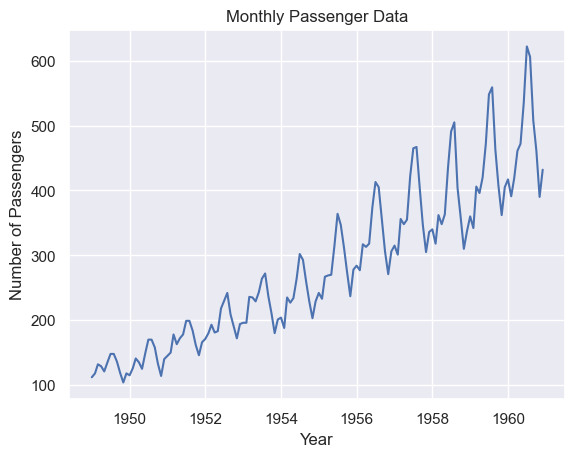

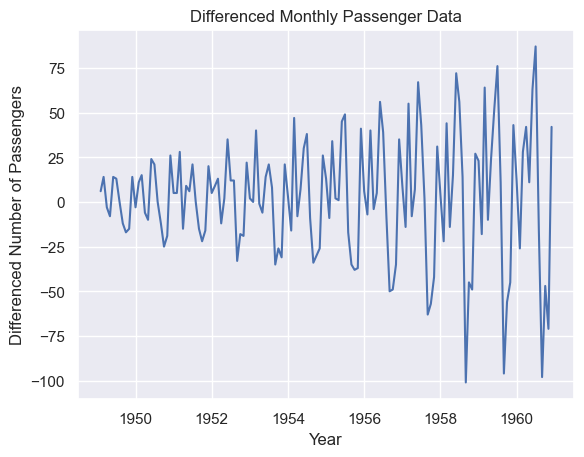

In [22]:
# Plot the passenger data
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Monthly Passenger Data')
plt.show()

# Take first difference of the data
data_diff = data.diff().dropna()

# Plot the differenced data
plt.plot(data_diff)
plt.xlabel('Year')
plt.ylabel('Differenced Number of Passengers')
plt.title('Differenced Monthly Passenger Data')
plt.show()


MA(1)

c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


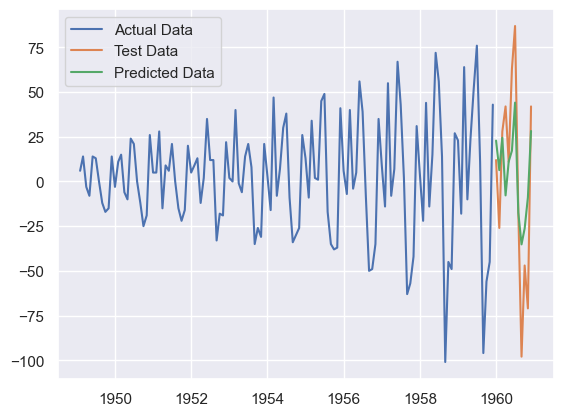

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train_data = data_diff.iloc[:len(data_diff)-12]
test_data = data_diff.iloc[len(data_diff)-12:]

# Fit an MA model with order 1 and lag 12 on the training data
model = ARIMA(train_data, order=(0,0,12), freq='MS').fit()

# Predict the next 12 months of passenger traffic using the fitted model
pred = model.predict(start=len(train_data), end=len(train_data)+11)

# Plot the actual and predicted passenger traffic for the test data
plt.plot(train_data.index, train_data, label='Actual Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(pred.index, pred.values, label='Predicted Data')
plt.legend()
plt.show()

Display the output

MA(2)

c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


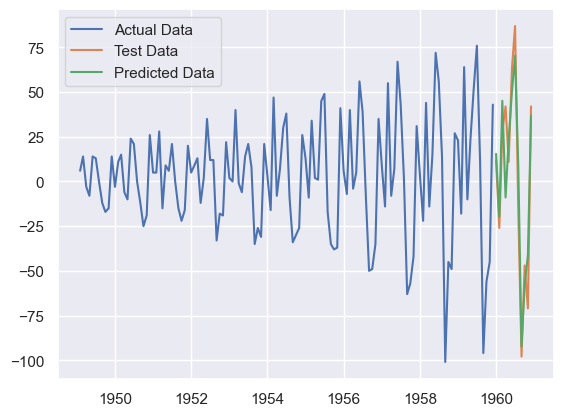

In [26]:
# Fit an ARMA(2,2) model on the training data
model = ARIMA(train_data, order=(12,0,12), seasonal_order=(0,0,0,0), freq='MS').fit()

# Predict the next 12 months of passenger traffic using the fitted model
pred = model.predict(start=len(train_data), end=len(train_data)+11)

# Plot the actual and predicted passenger traffic for the test data
plt.plot(train_data.index, train_data, label='Actual Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(pred.index, pred.values, label='Predicted Data')
plt.legend()
plt.show()

Display the output

AR(2)

c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


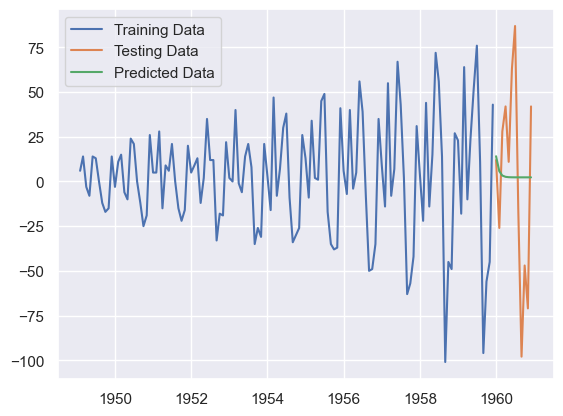

In [27]:
from statsmodels.tsa.api import AutoReg 

# Fit an autoregressive model with lag 1  lags=range(1, 13)
model = AutoReg(train_data, lags=1)
result = model.fit()

# Predict the next 12 months of passenger traffic
pred = result.predict(start=len(train_data), end=len(train_data)+11)

# Plot the actual and predicted passenger traffic
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Testing Data')
plt.plot(pred.index, pred.values, label='Predicted Data')
plt.legend()
plt.show()

ARMA (?,?)

c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


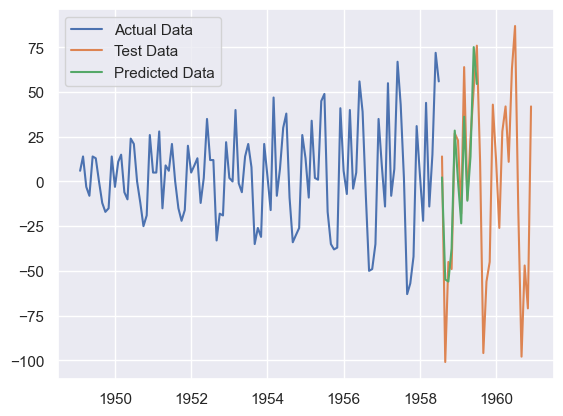

In [38]:
# Fit an ARMA(2,2) model on the training data
model = ARIMA(train_data, order=(12,0,12), seasonal_order=(0,0,0,0), freq='MS').fit()

# Predict the next 12 months of passenger traffic using the fitted model
pred = model.predict(start=len(train_data), end=len(train_data)+11)

# Plot the actual and predicted passenger traffic for the test data
plt.plot(train_data.index, train_data, label='Actual Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(pred.index, pred.values, label='Predicted Data')
plt.legend()
plt.show()

Display the output

ARIMA(?,?)

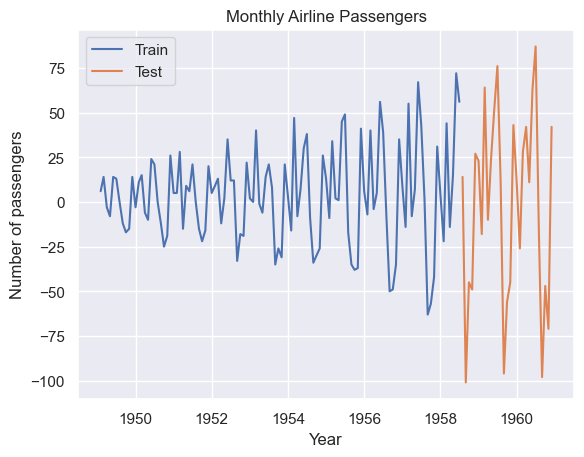

c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  114
Model:                ARIMA(13, 2, 1)   Log Likelihood                -430.643
Date:                Tue, 07 Mar 2023   AIC                            891.286
Time:                        23:03:47   BIC                            932.063
Sample:                    02-01-1949   HQIC                           907.830
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0334      0.148     -6.988      0.000      -1.323      -0.744
ar.L2         -1.0097      0.218     -4.639      0.000      -1.436      -0.583
ar.L3         -0.8864      0.227     -3.910      0.0

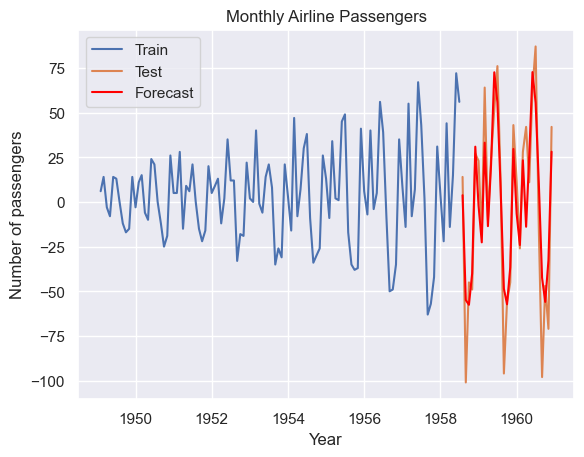

In [37]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

# Perform train-test split
train_data, test_data = train_test_split(data_diff, test_size=0.2, shuffle=False)

# Visualize the train and test data
plt.plot(train_data)
plt.plot(test_data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.legend(['Train', 'Test'])
plt.show()

# Fit an ARIMA model to the train data
model = ARIMA(train_data, order=(13, 2, 1))
results = model.fit()

# Print a summary of the model fit
print(results.summary())

# Generate forecasts for the test data
forecast = results.forecast(steps=len(test_data))

# Plot the train, test, and forecasted data
plt.plot(train_data)
plt.plot(test_data)
plt.plot(forecast, color='red')
plt.title('Monthly Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.legend(['Train', 'Test', 'Forecast'])
plt.show()

Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [35]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# split data into training and test sets
train_size = int(len(data_diff) * 0.8) # 80% for training
train_data, test_data = data_diff.iloc[:train_size], data.iloc[train_size:]

# fit ARMA model
arma_model = ARIMA(train_data, order=(2,0,2))
arma_fit = arma_model.fit()

# fit ARIMA model
arima_model = ARIMA(train_data, order=(2,1,2))
arima_fit = arima_model.fit()


# make predictions on test data using ARMA model
arma_pred = arma_fit.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# calculate RMSE for ARMA model
arma_rmse = np.sqrt(mean_squared_error(test_data, arma_pred))

# make predictions on test data using ARIMA model
arima_pred = arima_fit.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# calculate RMSE for ARIMA model
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_pred))

print('ARMA RMSE:', arma_rmse)
print('ARIMA RMSE:', arima_rmse)


c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARMA RMSE: 449.1806595091389
ARIMA RMSE: 444.2098664975879


c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Calculate AIC

c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARMA(1, 0, 1): AIC = 1267.37, BIC = 1278.90
ARMA(2, 0, 2): AIC = 1226.86, BIC = 1244.15


c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(12, 0, 12): AIC = 1038.22, BIC = 1113.17


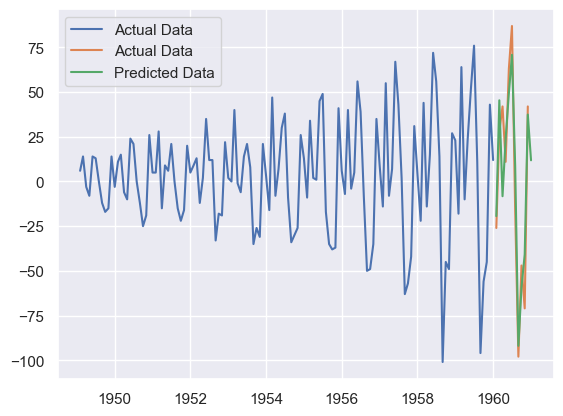

Best model: ARMA(12, 0, 12) - AIC = 1038.22, BIC = 1113.17


In [36]:
# Split the data into training and testing sets
train_data = data_diff.iloc[:len(data)-12]
test_data = data_diff.iloc[len(data)-12:]

# Fit ARMA models with different orders and choose the one with the lowest AIC
orders = [(1,0,1), (2,0,2), (12,0,12)]
best_model = None
best_aic = np.inf
results = []
for order in orders:
    try:
        ## In ARIMA, freq='MS' specifies that the time series data has a monthly frequency
        model = ARIMA(train_data, order=order, seasonal_order=(0,0,0,0), freq='MS').fit() 
        aic = model.aic
        bic=model.bic
        print(f"ARMA{order}: AIC = {aic:.2f}, BIC = {bic:.2f}")
        results.append((order, aic,bic))
        if aic < best_aic:
            best_model = model
            best_aic = aic
    except:
        continue

# Predict the next 12 months of passenger traffic using the best model
pred = best_model.predict(start=len(train_data), end=len(train_data)+11)


# Plot the actual and predicted passenger traffic for the test data
plt.plot(train_data.index, train_data, label='Actual Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(pred.index, pred.values, label='Predicted Data')
plt.legend()
plt.show()

# find order of best model
best_order, best_aic,best_bic = sorted(results, key=lambda x: x[1])[0]
      
# Print the AIC and BIC of the best model
print(f"Best model: ARMA{best_order} - AIC = {best_aic:.2f}, BIC = {best_bic:.2f}")